# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys

# Reading in the csv file

In [2]:
df = pd.read_csv('data.csv', index_col='property_id')

# Displaying the first 5 rows in the dataframe

In [3]:
df.head()

,sqft_hvac,lot_width,lot_depth,age_of_roof,miles_to_school,price
property_id,,,,,,
1,4247.5,93.3,180.5,10.2,3.9,713744.38
2,4354.5,95.4,133.1,29.6,1.0,688716.78
3,2088.3,91.1,177.8,2.7,2.2,467686.20
4,2258.8,81.2,115.2,25.4,1.1,419640.16
5,4703.8,93.5,93.9,4.5,2.9,671595.31


# Input `X` and target `y` as numpy arrays

In [4]:
X = np.array(df.drop('price', axis=1))
y = np.array(df['price'])

# Using PolynomialFeatures to expand X into 2nd degree polynomials.

In [5]:
X = PolynomialFeatures(degree=2).fit_transform(X)

# Creating a loop that looks for the most important features using the p-value of the Pearson correlation to the current residual. (The first time through the residual will just be Y .)

In [6]:
poly_columns = ['1', 'sqft_hvac', 'lot_width', 'lot_depth', 'age_of_roof', 'miles_to_school', 'sqft_hvac^2', 
                'sqft_hvac lot_width', 'sqft_hvac lot_depth', 'sqft_hvac age_of_roof', 'sqft_hvac miles_to_school',
               'lot_width^2', 'lot_width lot_depth', 'lot_width age_of_roof', 'lot_width miles_to_school', 
               'lot_depth^2', 'lot_depth age_of_roof', 'lot_depth miles_to_school',
               'age_of_roof^2', 'age_of_roof miles_to_school', 'miles_to_school^2']

poly_df = pd.DataFrame(X, columns=poly_columns)
# poly_df = poly_df[['1', 'sqft_hvac', 'sqft_hvac^2', 'sqft_hvac lot_width', 'sqft_hvac lot_depth', 'sqft_hvac age_of_roof', 'lot_width lot_depth', 'lot_depth^2', 'lot_depth', 'lot_width^2', 'lot_width', 'sqft_hvac miles_to_school', 'lot_depth age_of_roof', 'miles_to_school', 'miles_to_school^2', 'lot_width miles_to_school', 'age_of_roof miles_to_school','lot_width age_of_roof', 'age_of_roof', 'age_of_roof^2', 'lot_depth miles_to_school']]
# poly_columns = poly_df.columns

In [7]:
poly_df.head()

,1,sqft_hvac,lot_width,lot_depth,age_of_roof,miles_to_school,sqft_hvac^2,sqft_hvac lot_width,sqft_hvac lot_depth,sqft_hvac age_of_roof,...,lot_width^2,lot_width lot_depth,lot_width age_of_roof,lot_width miles_to_school,lot_depth^2,lot_depth age_of_roof,lot_depth miles_to_school,age_of_roof^2,age_of_roof miles_to_school,miles_to_school^2
0,1.0,4247.5,93.3,180.5,10.2,3.9,18041256.25,396291.75,766673.75,43324.50,...,8704.89,16840.65,951.66,363.87,32580.25,1841.10,703.95,104.04,39.78,15.21
1,1.0,4354.5,95.4,133.1,29.6,1.0,18961670.25,415419.30,579583.95,128893.20,...,9101.16,12697.74,2823.84,95.40,17715.61,3939.76,133.10,876.16,29.60,1.00
2,1.0,2088.3,91.1,177.8,2.7,2.2,4360996.89,190244.13,371299.74,5638.41,...,8299.21,16197.58,245.97,200.42,31612.84,480.06,391.16,7.29,5.94,4.84
3,1.0,2258.8,81.2,115.2,25.4,1.1,5102177.44,183414.56,260213.76,57373.52,...,6593.44,9354.24,2062.48,89.32,13271.04,2926.08,126.72,645.16,27.94,1.21
4,1.0,4703.8,93.5,93.9,4.5,2.9,22125734.44,439805.30,441686.82,21167.10,...,8742.25,8779.65,420.75,271.15,8817.21,422.55,272.31,20.25,13.05,8.41


# Function that computes the `p_value`

In [8]:
def compute_p_value(resd):
    for i in range(1, len(poly_columns)):
        _, p_value = pearsonr(poly_df[poly_columns[i]], resd)
        print(f'\t"{poly_columns[i]}" vs residual: p-value={p_value}')

In [9]:
residual = y
feature_indices = [0]

# Displaying the Output

In [10]:
print('First time through: using original price data as the residual')
compute_p_value(residual)
print('**** Fitting with ["1" "sqft_hvac" ] ****')
reg = LinearRegression()
reg.fit(poly_df[['1', 'sqft_hvac']], residual)
R2 = reg.score(poly_df[['1', 'sqft_hvac']], residual)
print(f'R2 = {R2}')
residual = reg.predict(poly_df[['1', 'sqft_hvac']])
print('Residual is updated')
compute_p_value(residual)
print('**** Fitting with ["1" "sqft_hvac" "lot_width lot_depth" ] ****')
reg = LinearRegression()
reg.fit(poly_df[['1', 'sqft_hvac', 'lot_width lot_depth']], y)
R2 = reg.score(poly_df[['1', 'sqft_hvac', 'lot_width lot_depth']], y)
print(f'R2 = {R2}')
print('Residual is updated')

First time through: using original price data as the residual
	"sqft_hvac" vs residual: p-value=0.0
	"lot_width" vs residual: p-value=7.502300252189193e-22
	"lot_depth" vs residual: p-value=1.349112505398765e-32
	"age_of_roof" vs residual: p-value=0.2204854707886266
	"miles_to_school" vs residual: p-value=6.314415223095078e-08
	"sqft_hvac^2" vs residual: p-value=0.0
	"sqft_hvac lot_width" vs residual: p-value=0.0
	"sqft_hvac lot_depth" vs residual: p-value=0.0
	"sqft_hvac age_of_roof" vs residual: p-value=8.731082754175303e-55
	"sqft_hvac miles_to_school" vs residual: p-value=9.519591803622703e-21
	"lot_width^2" vs residual: p-value=5.993692365884732e-22
	"lot_width lot_depth" vs residual: p-value=4.1868028438284917e-41
	"lot_width age_of_roof" vs residual: p-value=0.014189712836334
	"lot_width miles_to_school" vs residual: p-value=3.3260830318919526e-05
	"lot_depth^2" vs residual: p-value=1.1014229237235183e-34
	"lot_depth age_of_roof" vs residual: p-value=9.568489304909097e-09
	"lot_

# Visualizing the Output

Making scatter plot: age_of_roof vs final residual
Making a scatter plot: miles_from_school vs final residual


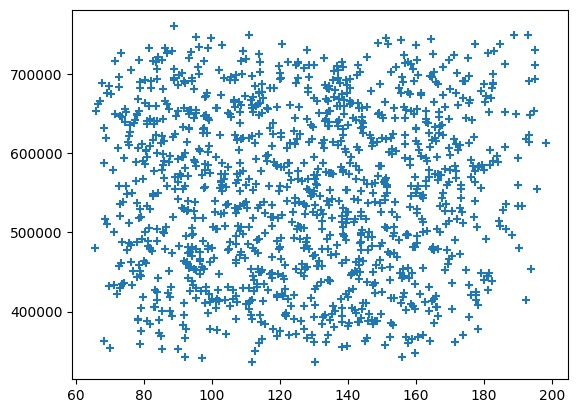

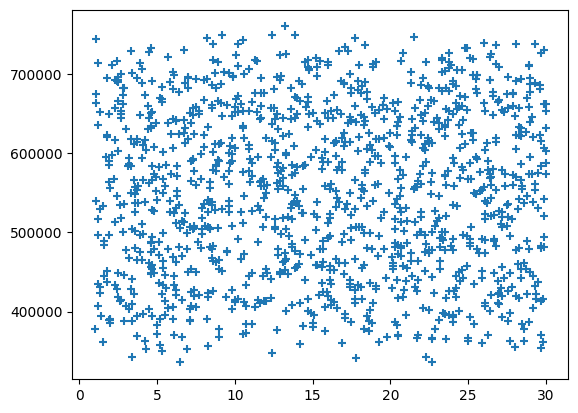

In [11]:
# Any relationship between the final residual and the unused variables?
print("Making scatter plot: age_of_roof vs final residual")
fig, ax = plt.subplots()
ax.scatter(X[:,3], residual, marker='+')
fig.savefig("ResidualRoof.png")

print("Making a scatter plot: miles_from_school vs final residual")
fig, ax = plt.subplots()
ax.scatter(X[:,4], residual, marker='+')
fig.savefig("ResidualMiles.png")